final report

Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question
Can player engagement variables such as total playtime, experience level, and number of interactions help predict whether a player subscribes to the game related newsletter?

Each report should include the following sections:


Garfield: completes below part of the project. 

Methods & Results:
describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.

your report should include code which:
1. loads data 
2. wrangles and cleans the data to the format necessary for the planned analysis
3. performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
4. creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
5. performs the data analysis
6. creates a visualization of the analysis

note: all figures should have a figure number and a legend

1. loads data

In [34]:
# Load required library
library(tidyverse)

# Download the datasets from the group GitHub repository
download.file("https://raw.githubusercontent.com/emily2628/Dsci-100---Final-Project/main/players%20(1).csv", 
              "players.csv")
download.file("https://raw.githubusercontent.com/emily2628/Dsci-100---Final-Project/main/sessions.csv", 
              "sessions.csv")

# Read these files into R as data frames
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

# Display the dimensions and first few rows of each dataset to verify successful loading
print("Players dataset:")
dim(players)
head(players)

print("Sessions dataset:")
dim(sessions)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Players dataset:"


[1] 196   7

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] "Sessions dataset:"


[1] 1535    5

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


2. wrangles and cleans the data to the format necessary for the planned analysis

In [35]:
# 1. Calculate player engagement from sessions data
player_engagement <- sessions |>
  group_by(hashedEmail) |>
  summarize(
    total_sessions = n(),
    avg_session_duration = mean(as.numeric(end_time) - as.numeric(start_time)), na.rm = TRUE
  )

# 2. Merge player data with engagement
analysis_data <- players |>
  select(hashedEmail, Age, gender, experience, played_hours, subscribe) |>
  merge(player_engagement, by = "hashedEmail")

# 3. Convert these categorical vairables to factors
analysis_data <- analysis_data |>
  mutate(
    subscribe = as_factor(subscribe),
    experience = as_factor(experience),
    gender = as_factor(gender)
  )

# 4. Make a dataset with these columns
model_data <- analysis_data |>
  select(subscribe, experience, played_hours, total_sessions, Age, gender)

model_data

Warning message:
“There were 250 warnings in `summarize()`.
The first warning was:
ℹ In argument: `avg_session_duration = mean(as.numeric(end_time) -
  as.numeric(start_time))`.
ℹ In group 1: `hashedEmail =
  "0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832"`.
Caused by warning in `mean()`:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 249 remaining warnings.”


subscribe,experience,played_hours,total_sessions,Age,gender
<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>
TRUE,Regular,1.5,2,20,Male
FALSE,Pro,0.4,1,21,Male
TRUE,Beginner,0.1,1,17,Male
TRUE,Regular,5.6,13,17,Male
TRUE,Pro,1.0,2,17,Male
FALSE,Veteran,0.1,1,19,Male
TRUE,Amateur,0.7,1,21,Female
TRUE,Amateur,17.2,41,14,Male
FALSE,Beginner,0.2,1,37,Female


In [36]:
# Calculate Subscription Rates by Group
subscription_summary <- model_data |>
  group_by(experience) |>
  summarize(
    total_players = n(),
    subscribers = sum(subscribe == TRUE),
    subscription_rate = mean(subscribe == TRUE),
    avg_playtime = mean(played_hours),
    avg_sessions = mean(total_sessions)
  )
subscription_summary

experience,total_players,subscribers,subscription_rate,avg_playtime,avg_sessions
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
Regular,23,19,0.8260870,28.500000,22.565217
Pro,11,8,0.7272727,3.309091,3.545455
Beginner,22,17,0.7727273,1.986364,4.818182
Veteran,27,17,0.6296296,1.151852,1.888889
Amateur,42,32,0.7619048,9.026190,19.523810


To approaach both questions, our idea is to first perform exploratory analysis by comparing factors and engagement patterns. Then I will use classification modeling with KNN to predict subscription status based on playtime, session count, experience level, and etc. Finally, I will analyze which features are most predictive (most effective) by some creating visualizations and models later that will show how subscription behavior does in different variables.

I will use classification because our specific question asks to predict whether a player subscribes (categorical), which is a typical classification problem for KNN classification.

3. performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis

In [37]:
# I will go over all predictors/variables to compare with subscription

# Subscription rates by gender (multiply by 100 to get the percentage if we need)
gender_summary <- model_data |>
  group_by(gender, subscribe) |>
  summarize(count = n()) |>
  group_by(gender) |>
  mutate(total = sum(count),
         subscription_rate = count / total)

gender_summary

# Subscription rates by experience level (multiply by 100 to get the percentage if we need)
experience_summary <- model_data |>
  group_by(experience, subscribe) |>
  summarize(count = n()) |>
  group_by(experience) |>
  mutate(total = sum(count),
         subscription_rate = count / total)

experience_summary


# Average age by subscription status 
age_summary <- model_data |>
  group_by(subscribe) |>
  summarize(avg_age = mean(Age),
            count = n())

age_summary

# Average engagement by subscription status
engagement_summary <- model_data |>
  group_by(subscribe) |>
  summarize(avg_played_hours = mean(played_hours),
            avg_total_sessions = mean(total_sessions),
            count = n())

engagement_summary

# Correlation between numeric variables and subscription
total_subscription_rate <- model_data |>
  summarize(subscription_rate = mean(subscribe == TRUE),
            total_players = n())

total_subscription_rate

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,subscribe,count,total,subscription_rate
<fct>,<fct>,<int>,<int>,<dbl>
Male,FALSE,21,83,0.2530120
Male,TRUE,62,83,0.7469880
Female,FALSE,6,24,0.2500000
Female,TRUE,18,24,0.7500000
Non-binary,FALSE,1,6,0.1666667
Non-binary,TRUE,5,6,0.8333333
Two-Spirited,FALSE,1,4,0.2500000
Two-Spirited,TRUE,3,4,0.7500000
Prefer not to say,FALSE,3,6,0.5000000


`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,count,total,subscription_rate
<fct>,<fct>,<int>,<int>,<dbl>
Regular,FALSE,4,23,0.1739130
Regular,TRUE,19,23,0.8260870
Pro,FALSE,3,11,0.2727273
Pro,TRUE,8,11,0.7272727
Beginner,FALSE,5,22,0.2272727
Beginner,TRUE,17,22,0.7727273
Veteran,FALSE,10,27,0.3703704
Veteran,TRUE,17,27,0.6296296
Amateur,FALSE,10,42,0.2380952


subscribe,avg_age,count
<fct>,<dbl>,<int>
FALSE,23.8125,32
TRUE,NA,93


subscribe,avg_played_hours,avg_total_sessions,count
<fct>,<dbl>,<dbl>,<int>
FALSE,0.815625,3.21875,32
TRUE,12.039785,15.39785,93


subscription_rate,total_players
<dbl>,<int>
0.744,125


From the summary tables, we can't clearly see which variable/factor affects the most. Therefore, in the visualization below, I will create multiple plots to see each variable's relationship with subscription status separately for clearer interpretation.

4. creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis

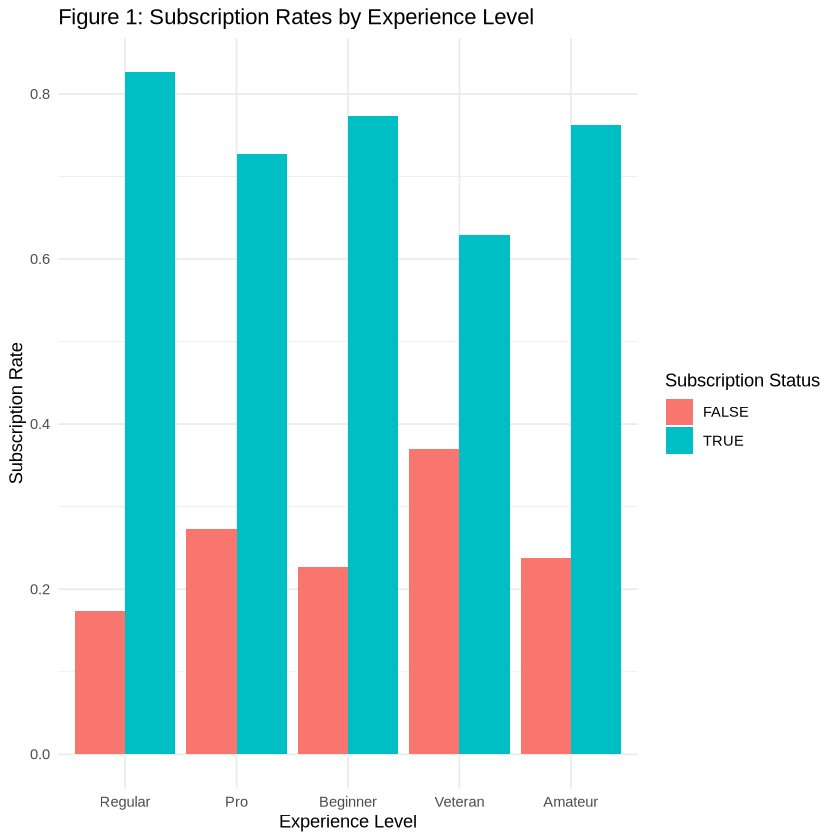

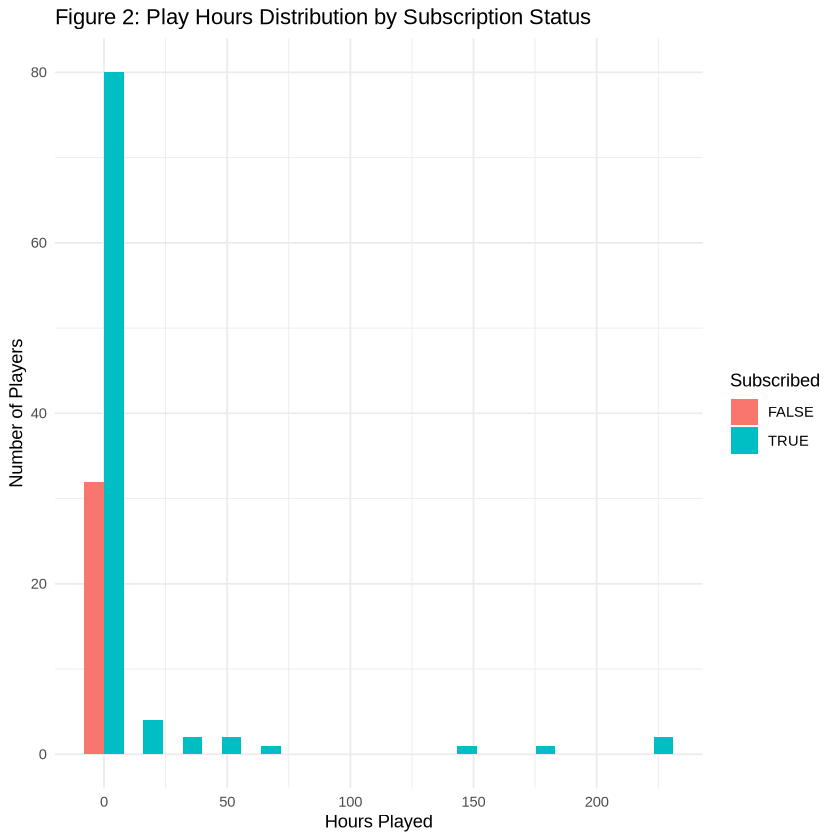

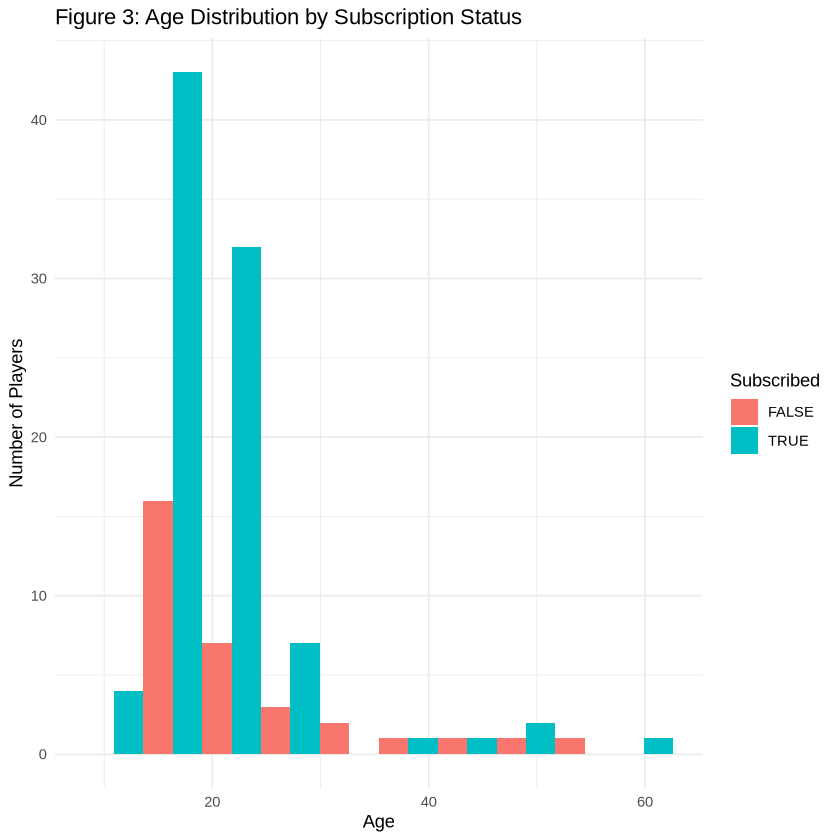

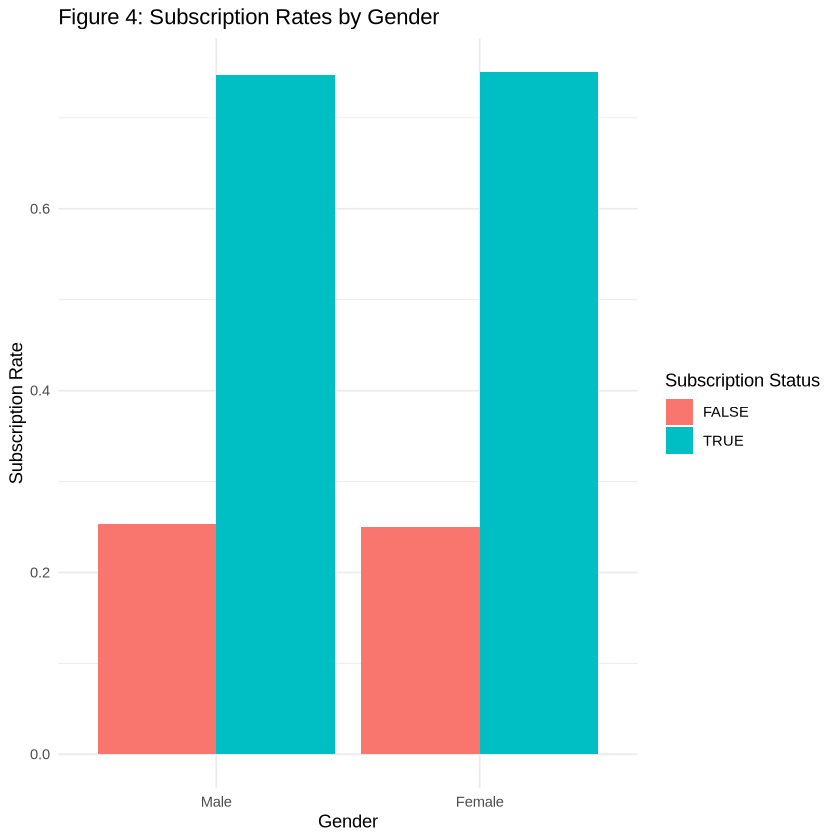

In [38]:
# Subscription rates by experience level
plot1 <- ggplot(experience_summary, 
                aes(x = experience, y = subscription_rate, fill = subscribe)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Figure 1: Subscription Rates by Experience Level",
       x = "Experience Level", 
       y = "Subscription Rate",
       fill = "Subscription Status") +
  theme_minimal()

plot1

# Play hours distribution by subscription status
plot2 <- ggplot(model_data, 
                aes(x = played_hours, fill = subscribe)) +
  geom_histogram(position = "dodge", bins = 15) +
  labs(title = "Figure 2: Play Hours Distribution by Subscription Status",
       x = "Hours Played", 
       y = "Number of Players",
       fill = "Subscribed") +
  theme_minimal()

plot2

# Age distribution by subscription status
age_plot_data <- model_data |>
  filter(is.na(Age)==FALSE)

plot3 <- ggplot(age_plot_data, 
                aes(x = Age, fill = subscribe)) +
  geom_histogram(position = "dodge", bins = 10) +
  labs(title = "Figure 3: Age Distribution by Subscription Status",
       x = "Age", 
       y = "Number of Players",
       fill = "Subscribed") +
  theme_minimal()

plot3

# Subscription rates by gender 
# Filter to show main gender categories separately
gender_male <- gender_summary |> filter(gender == "Male")
gender_female <- gender_summary |> filter(gender == "Female")

# Combine for plotting
gender_main_data <- bind_rows(gender_male, gender_female)

plot4 <- ggplot(gender_main_data,
                aes(x = gender, y = subscription_rate, fill = subscribe)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Figure 4: Subscription Rates by Gender",
       x = "Gender",
       y = "Subscription Rate",
       fill = "Subscription Status") +
  theme_minimal()

plot4

5. Data_Analysis:

6. Additional Classification and Visualization

In [52]:
# Classification Model: Predicting Newsletter Subscription (Fixed)

# Set seed for reproducibility
set.seed(123)


# Split data into two sets

subscription_split <- initial_split(model_data_clean, prop = 0.75, strata = subscribe)
subscription_training <- training(subscription_split)
subscription_testing <- testing(subscription_split)

# Create recipe
subscription_recipe <- recipe(subscribe ~ experience + played_hours + total_sessions, 
                              data = subscription_training) |>
  step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors())

# To find best K
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# Use 5-fold CV
subscription_vfold <- vfold_cv(subscription_training, v = 5, strata = subscribe)

# Create grid of k values to try (using seq() as you mentioned)
k_grid <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

# Tune/Workflow
knn_workflow <- workflow() |>
  add_recipe(subscription_recipe) |>
  add_model(knn_spec)|>
  tune_grid(resamples = subscription_vfold, grid = k_grid)

# Find best k value
best_k <- knn_results |>
  collect_metrics() |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)

best_k

# Use best k
best_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

best_fit <- workflow() |>
  add_recipe(subscription_recipe) |>
  add_model(best_knn_spec) |>
  fit(data = subscription_training)

# Try testing data
predictions <- predict(best_fit, subscription_testing)|>
bind_cols(subscription_testing)


# Evaluate model performance
subscription_metrics <- predictions |>
  metrics(truth = subscribe, estimate = .pred_class)

subscription_metrics

# Create confusion matrix
confusion_matrix <- predictions |>
  conf_mat(truth = subscribe, estimate = .pred_class)

confusion_matrix

[1] 11

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7419355
kap,binary,0.0000000


          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE      8   23

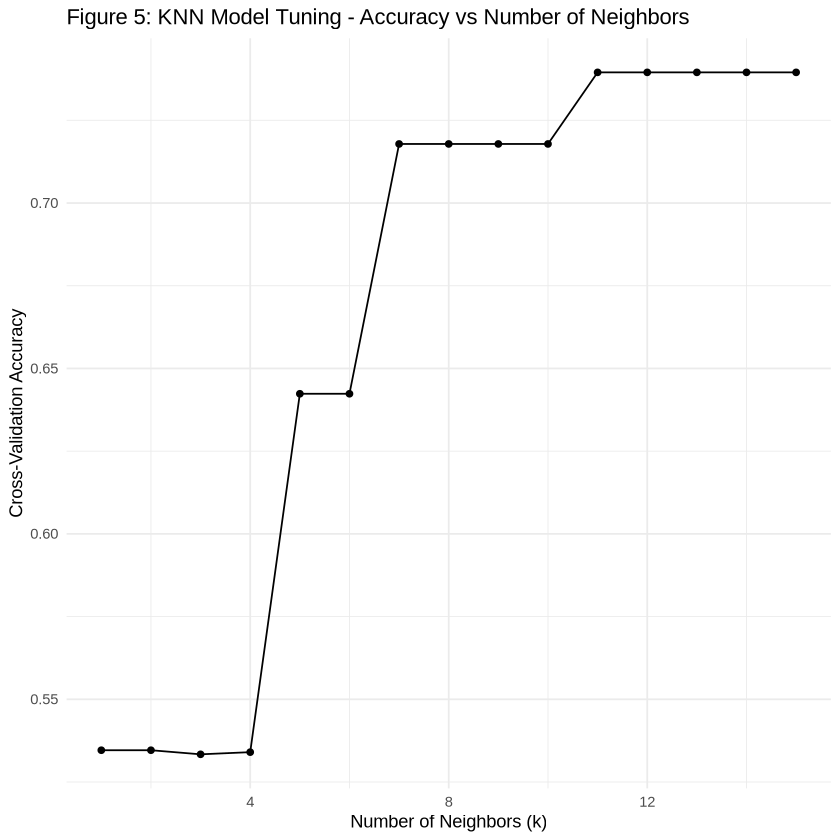

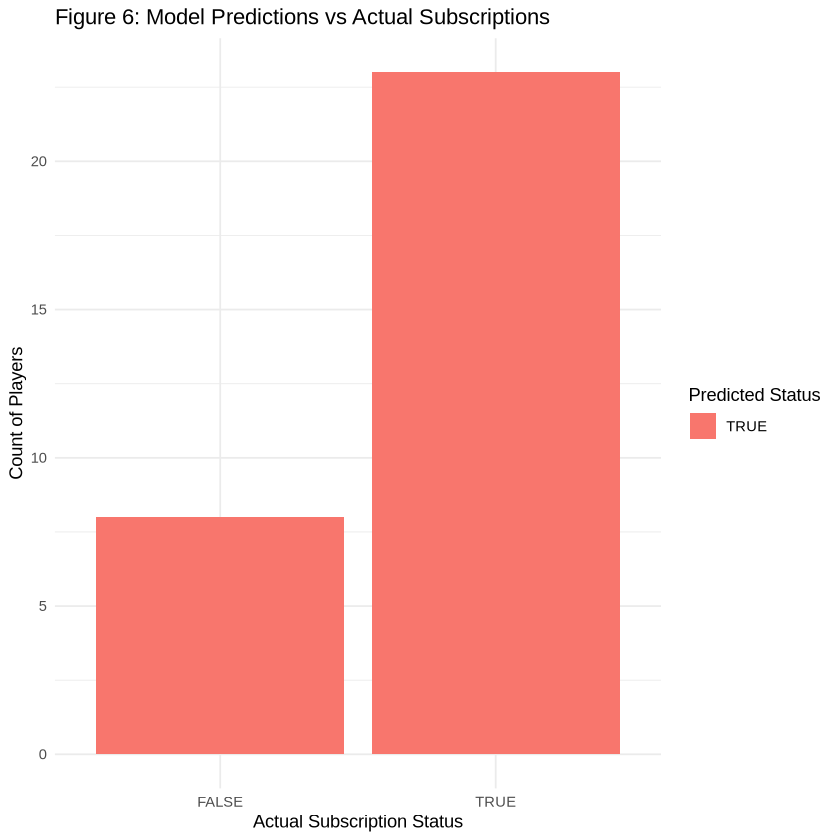

In [54]:
# Model Accuracy vs Number of Neighbors
accuracy_plot <- knn_results |>
  collect_metrics() |>
  filter(.metric == "accuracy") |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(title = "Figure 5: KNN Model Tuning - Accuracy vs Number of Neighbors",
       x = "Number of Neighbors (k)",
       y = "Cross-Validation Accuracy"
      ) +
  theme_minimal()

accuracy_plot

# Actual vs Predicted Subscriptions
prediction_plot <- predictions |>
  ggplot(aes(x = subscribe, fill = .pred_class)) +
  geom_bar(position = "dodge") +
  labs(title = "Figure 6: Model Predictions vs Actual Subscriptions",
       x = "Actual Subscription Status",
       y = "Count of Players",
       fill = "Predicted Status"
       ) +
  theme_minimal()

prediction_plot